# Project Name - analyze scrap data

### About the project
This is an EDA project to analyze the data of jobs scraped from three job sites viz. Naukri Jobs, Indeed Jobs and LinkedIn Jobs to uncover insights on types of data science jobs available, skills required, experience required, work mode (hybrid, remote, WFO) and compensation.  
This is an extension of the Web Scraping project of the three job sites as the input to this project is the scraped data from the web scraping project.

### Problem Statement
Navigating the Data Science Job Landscape. 

### Activities Performed : Data Wrangling and Data Visualization
##### Libraries used :  pandas, matplotlib, seaborn
### Data Wrangling  

1. Identified null and missing values.
2. Replaced inconsistent naming formats with appropriate names to make the data standardized for analysis.
3. Created functions for cleaning highly non-standardized data like salary and location.
4. Created new columns like Work_Type from existing columns to analyze aspects of the jobs data which were not present explicitly.

### Data Visualization
Filtered and cleaned the data further to create relevant and insightful visualizations like wordcloud, column charts, pie charts  to analyze different aspects of the jobs data.

## Lets's Begin

##### Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud

##### Load the data

In [2]:
# This csv file contains data on 180 data science jobs in India scraped from the the following websites:
# Naukri Jobs: www.naukri.com
# Indeed Jobs: in.indeed.com/jobs
# LinkedIn Jobs: www.linkedin.com/jobs

# Load the file
df = pd.read_csv("naukri_indeed_linkedin_jobs.csv")

##### Check the shape of data

In [3]:
# Check the shape
df.shape

(180, 9)

### Data Wrangling

In [4]:
# Check the number of non-null values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          180 non-null    object
 1   Job_Link       180 non-null    object
 2   Company        180 non-null    object
 3   Experience     180 non-null    object
 4   Salary         180 non-null    object
 5   Location       180 non-null    object
 6   Skills         180 non-null    object
 7   Job_Post_Date  180 non-null    object
 8   Job_Site_Name  180 non-null    object
dtypes: object(9)
memory usage: 12.8+ KB


In [5]:
# Check the number of missing values
df.isnull().sum()

Title            0
Job_Link         0
Company          0
Experience       0
Salary           0
Location         0
Skills           0
Job_Post_Date    0
Job_Site_Name    0
dtype: int64

Note: There are no missing values in the data.

In [6]:
# View the first five rows
df.head()

,Title,Job_Link,Company,Experience,Salary,Location,Skills,Job_Post_Date,Job_Site_Name
0,Data Science Analytics Sr Analyst - Data Science,https://www.naukri.com/job-listings-data-scien...,Accenture,5-8 Yrs,Not disclosed,Mumbai,"Data Science, Publishing, Artificial Intellige...",2 Days Ago,Naukri Jobs
1,Data Science Domain Manager,https://www.naukri.com/job-listings-data-scien...,Coursera,7-11 Yrs,Not disclosed,"Kolkata, Mumbai, New Delhi, Hyderabad/Secunder...","Computer science, Content strategy, Data analy...",5 Days Ago,Naukri Jobs
2,Data Science Analyst II Developer,https://www.naukri.com/job-listings-data-scien...,Aditya Industries,0-5 Yrs,4-9 Lacs PA,"Noida, Uttar Pradesh, Gurgaon/ Gurugram, Harya...","Data Science, Data Science Analyst, DATA, Adva...",5 Days Ago,Naukri Jobs
3,"Senior Analyst, Data Science & Analytics",https://www.naukri.com/job-listings-senior-ana...,Transunion,1-2 Yrs,Not disclosed,Pune,"Data analysis, Operations research, Linux, Ris...",11 Days Ago,Naukri Jobs
4,Senior Data Analyst (Data Science),https://www.naukri.com/job-listings-senior-dat...,Trigyn Technologies,5-10 Yrs,Not disclosed,Remote,"Data Science, Data Mart, Artificial Intelligen...",11 Days Ago,Naukri Jobs


In [7]:
# View the last five rows
df.tail()

,Title,Job_Link,Company,Experience,Salary,Location,Skills,Job_Post_Date,Job_Site_Name
175,Data Scientist - Python/Machine Learning,https://in.linkedin.com/jobs/view/data-scienti...,CavinKare,Not available,Not available,"Chennai, Tamil Nadu, India",Not available,1 week ago,LinkedIn Jobs
176,Data Scientist,https://in.linkedin.com/jobs/view/data-scienti...,Obviously AI,Not available,Not available,"Bengaluru, Karnataka, India",Not available,4 months ago,LinkedIn Jobs
177,Data Scientist - Business Intelligence,https://in.linkedin.com/jobs/view/data-scienti...,"Dubai Jobs, Gulf Jobs, Jobs in Dubai, Qatar, K...",Not available,Not available,"Bangalore Urban, Karnataka, India",Not available,5 days ago,LinkedIn Jobs
178,Data Scientist - Machine Learning,https://in.linkedin.com/jobs/view/data-scienti...,"Dubai Jobs, Gulf Jobs, Jobs in Dubai, Qatar, K...",Not available,Not available,"Bangalore Urban, Karnataka, India",Not available,5 days ago,LinkedIn Jobs
179,AI and ML Engineer,https://in.linkedin.com/jobs/view/ai-and-ml-en...,INSTATALENT RECRUIT LLP,Not available,Not available,"Bengaluru, Karnataka, India",Not available,2 weeks ago,LinkedIn Jobs


We can see that for the fields where data is not present, some are displayed as 'Not disclosed' and some as 'Not available'. Let us make this uniform by replacing all 'Not disclosed' fields with 'Not available'.

In [8]:
df = df.replace('Not disclosed', 'Not available')

df.head()

,Title,Job_Link,Company,Experience,Salary,Location,Skills,Job_Post_Date,Job_Site_Name
0,Data Science Analytics Sr Analyst - Data Science,https://www.naukri.com/job-listings-data-scien...,Accenture,5-8 Yrs,Not available,Mumbai,"Data Science, Publishing, Artificial Intellige...",2 Days Ago,Naukri Jobs
1,Data Science Domain Manager,https://www.naukri.com/job-listings-data-scien...,Coursera,7-11 Yrs,Not available,"Kolkata, Mumbai, New Delhi, Hyderabad/Secunder...","Computer science, Content strategy, Data analy...",5 Days Ago,Naukri Jobs
2,Data Science Analyst II Developer,https://www.naukri.com/job-listings-data-scien...,Aditya Industries,0-5 Yrs,4-9 Lacs PA,"Noida, Uttar Pradesh, Gurgaon/ Gurugram, Harya...","Data Science, Data Science Analyst, DATA, Adva...",5 Days Ago,Naukri Jobs
3,"Senior Analyst, Data Science & Analytics",https://www.naukri.com/job-listings-senior-ana...,Transunion,1-2 Yrs,Not available,Pune,"Data analysis, Operations research, Linux, Ris...",11 Days Ago,Naukri Jobs
4,Senior Data Analyst (Data Science),https://www.naukri.com/job-listings-senior-dat...,Trigyn Technologies,5-10 Yrs,Not available,Remote,"Data Science, Data Mart, Artificial Intelligen...",11 Days Ago,Naukri Jobs


##### Clean the data - 'Job_Post_Date'

In [9]:
# Clean the data in 'Job_Post_Date' column to make it consistent.

df['Job_Post_Date'] = df['Job_Post_Date'].str.replace('Days', 'days')
df['Job_Post_Date'] = df['Job_Post_Date'].str.replace('Day', 'day')
df['Job_Post_Date'] = df['Job_Post_Date'].str.replace('Months', 'months')
df['Job_Post_Date'] = df['Job_Post_Date'].str.replace('Month', 'month')
df['Job_Post_Date'] = df['Job_Post_Date'].str.replace('Hours', 'hours')
df['Job_Post_Date'] = df['Job_Post_Date'].str.replace('Hour', 'hour')
df['Job_Post_Date'] = df['Job_Post_Date'].str.replace('Ago', 'ago')

In [10]:
df['Job_Post_Date'].unique()

array(['2 days ago', '5 days ago', '11 days ago', '1 day ago',
       '16 days ago', '6 days ago', '30+ days ago', '25 days ago',
       '10 days ago', '13 days ago', '12 days ago', '9 days ago',
       '26 days ago', '30 days ago', '3 days ago', '8 days ago',
       '17 days ago', 'Just posted', 'Today', 'Hiring ongoing',
       'Posted 1 day ago', 'Active 2 days ago', 'Posted 2 days ago',
       'Active 1 day ago', '1 week ago', '4 months ago', '1 month ago',
       '2 weeks ago', '5 months ago', '3 weeks ago', '6 hours ago'],
      dtype=object)

##### Clean the data - 'Experience'

In [11]:
# Check the count of unique values in 'Experience' column

df[['Job_Site_Name','Experience']].value_counts()

Job_Site_Name  Experience   
Indeed Jobs    Not available    60
LinkedIn Jobs  Not available    60
Naukri Jobs    5-8 Yrs           6
               5-10 Yrs          5
               6-8 Yrs           4
               1-2 Yrs           4
               3-5 Yrs           3
               3-8 Yrs           3
               2-5 Yrs           3
               1-4 Yrs           3
               8-13 Yrs          3
               7-11 Yrs          2
               6-11 Yrs          2
               8-10 Yrs          2
               3-6 Yrs           2
               12-15 Yrs         2
               4-8 Yrs           2
               0-5 Yrs           2
               5-9 Yrs           2
               6-10 Yrs          2
               8-11 Yrs          1
               4-7 Yrs           1
               5-6 Yrs           1
               2-4 Yrs           1
               12-20 Yrs         1
               10-12 Yrs         1
               0-3 Yrs           1
               8-15 Yrs   

Note: The format of the experience data is consistent. We can use this data as is. However, since this data is not available for indeed and linkedin jobs, we would have to analyze the experience based only on naukri jobs data. 

##### Clean the data - 'Salary'

In [12]:
# Check the count of unique values in 'Salary' column

df[['Job_Site_Name','Salary']].value_counts()

Job_Site_Name  Salary                        
LinkedIn Jobs  Not available                     60
Indeed Jobs    Not available                     50
Naukri Jobs    Not available                     49
Indeed Jobs    ₹15,000 - ₹40,000 a month          2
Naukri Jobs    13-18 Lacs PA                      2
               18-30 Lacs PA                      2
               4-9 Lacs PA                        2
               8-18 Lacs PA                       2
Indeed Jobs    ₹2,500 a month                     1
               ₹20,000 - ₹40,000 a month          1
               ₹25,00,000 - ₹30,00,000 a year     1
               ₹25,000 - ₹55,000 a month          1
               ₹35,000 - ₹50,000 a month          1
               ₹10,086 - ₹34,553 a month          1
               ₹15,000 - ₹20,000 a month          1
Naukri Jobs    35-45 Lacs PA                      1
               6-11 Lacs PA                       1
               7-12 Lacs PA                       1
Indeed Jobs    ₹54

Note: Salary data is not standardized. We will have to clean this data to make sense of salary ranges and average salaries for jobs where this information is available.

In [13]:
# Create a function for salary manipulation.

def salary_manipulation(df):
    '''
    This function is used to clean scraped salary data.
    
    Args:
        df: A Pandas Dataframe object.
        
    Returns:
        df: A (cleaned) Pandas Dataframe object.
    '''
    
    # Replace inconsistent formats with standardized terms.
    df['Salary'] = df['Salary'].str.replace('₹', '')
    df['Salary'] = df['Salary'].str.replace(',', '')
    df['Salary'] = df['Salary'].str.replace('a year', 'PA')
    df['Salary'] = df['Salary'].str.replace('a month', 'PM')
    df['Salary'] = df['Salary'].str.replace('an hour', 'PH')
    
    # Create a for loop to iterate over over each row in the df.
    for index, row in df.iterrows():

        # Create a consistent format of the lower range of salary.
        sal_lower_range = row['Salary'].split('-')[0]
        # Use try-except to catch 'Out of Index' error.
        try:
            if sal_lower_range == 'Not available':
                sal_lower_range = 'Not available'
            elif 'Lacs' in row['Salary'].split('-')[1]:
                sal_lower_range = int(float(sal_lower_range)*100000)        
            else:
                sal_lower_range = sal_lower_range
            # Convert per month salary to per annum.
            if 'PM' in row['Salary'].split('-')[1]:
                sal_lower_range = int(float(sal_lower_range) * 12)            
        except:
            sal_lower_range = sal_lower_range
        sal_lower_range = str(sal_lower_range).strip()
        
        # Convert per hour salary to per annum (for standalone salary values that are not specified as range with a '-').
        # Assumption: Assuming an 8 hour day for 5 days, per annum pay would be salary*8*20*12
        if 'PH' in str(sal_lower_range):
            salary = int(float(str(sal_lower_range).split()[0])*8*20*12)
            sal_lower_range = salary
            
        # Convert per month salary to per annum(for standalone salary values that are not specified as range with a '-').    
        if 'PM' in str(sal_lower_range):
            salary = int(sal_lower_range.split()[0]) * 12
            sal_lower_range = salary  
        

        # Create a consistent format of the Upper range of salary.
        # Use try-except to catch 'Out of Index' error.
        try:
            sal_upper_range_full = row['Salary'].split('-')[1].strip()     
        except:
            sal_upper_range_full = sal_lower_range  
        if 'Lacs' in str(sal_upper_range_full):
            sal_upper_range = int(float(sal_upper_range_full.split()[0]) * 100000)
        else:
            sal_upper_range = sal_upper_range_full
            
        # Convert per month salary to per annum.
        if 'PM' in str(sal_upper_range):    
            sal_upper_range = int(sal_upper_range.split()[0]) * 12
            
        # Convert per hour salary to per annum.    
        # Assumption: Assuming an 8 hour day for 5 days, per annum pay would be salary*8*20*12
        if 'PH' in str(sal_upper_range):
            salary = int(float(str(sal_upper_range).split()[0])*8*20*12)
            sal_upper_range = salary
            
        if 'PA' in str(sal_upper_range):
            sal_upper_range = str(sal_upper_range).split()[0]
            

        # Concatenate the lower and upper salary ranges and store it in a new variable called 'salary_range'
        salary_range = str(sal_lower_range) + '-' + str(sal_upper_range)    

        # Update the salary column with the new salary range values.
        df.at[index, 'Salary'] = salary_range

    # Replace 'Not available-Not available' to 'Not available'.
    df = df.replace('Not available-Not available', 'Not available')

    return df


In [14]:
# Call the salary_manipulation function and display the first 5 rows.

df = salary_manipulation(df)
df.head()

,Title,Job_Link,Company,Experience,Salary,Location,Skills,Job_Post_Date,Job_Site_Name
0,Data Science Analytics Sr Analyst - Data Science,https://www.naukri.com/job-listings-data-scien...,Accenture,5-8 Yrs,Not available,Mumbai,"Data Science, Publishing, Artificial Intellige...",2 days ago,Naukri Jobs
1,Data Science Domain Manager,https://www.naukri.com/job-listings-data-scien...,Coursera,7-11 Yrs,Not available,"Kolkata, Mumbai, New Delhi, Hyderabad/Secunder...","Computer science, Content strategy, Data analy...",5 days ago,Naukri Jobs
2,Data Science Analyst II Developer,https://www.naukri.com/job-listings-data-scien...,Aditya Industries,0-5 Yrs,400000-900000,"Noida, Uttar Pradesh, Gurgaon/ Gurugram, Harya...","Data Science, Data Science Analyst, DATA, Adva...",5 days ago,Naukri Jobs
3,"Senior Analyst, Data Science & Analytics",https://www.naukri.com/job-listings-senior-ana...,Transunion,1-2 Yrs,Not available,Pune,"Data analysis, Operations research, Linux, Ris...",11 days ago,Naukri Jobs
4,Senior Data Analyst (Data Science),https://www.naukri.com/job-listings-senior-dat...,Trigyn Technologies,5-10 Yrs,Not available,Remote,"Data Science, Data Mart, Artificial Intelligen...",11 days ago,Naukri Jobs


In [15]:
# Check the unique values and their count to confirm the standardized salary data format.
df['Salary'].value_counts()

Not available      159
1300000-1800000      2
800000-1800000       2
1800000-3000000      2
400000-900000        2
180000-480000        2
240000-480000        1
300000-660000        1
121032-414636        1
2500000-3000000      1
54000-200000         1
30000-30000          1
180000-240000        1
700000-1200000       1
3500000-4500000      1
600000-1100000       1
420000-600000        1
Name: Salary, dtype: int64

##### Clean the data - 'Location'

###### Use the 'Location' column to create a new column 'Work_type' to indicate Hybrid, Remote or WFO (Work from Office).

In [16]:
# Create a function to define work_type.

def work_type(df):
    '''
    This function is used create a new column 'Work_Type' in the input dataframe with values 'Hybrid', 'Remote', 'WFO' by referring to the values in the 'Location' column.
    
    Args:
        df: A Pandas Dataframe object.
        
    Returns:
        df: A Pandas Dataframe object with 'Work_Type' column added.
    '''
    for index, row in df.iterrows():
        if ('Hybrid' or 'hybrid') in row['Location']:
            work_type = 'Hybrid'
        elif ('Remote' or 'remote') in row['Location']:
            work_type = 'Remote'
        else:
            work_type = 'WFO'

        df.at[index, 'Work_Type'] = work_type
        
    return(df)

In [17]:
# # Check the unique values of work type and their count.
df = work_type(df)
df['Work_Type'].value_counts()

WFO       158
Hybrid     14
Remote      8
Name: Work_Type, dtype: int64

##### Clean the 'Location' column to remove inconsistencies

In [18]:
# Create a function to clean the location column to remove naming inconsistencies.
# Note: This function would be required to be updated with new data if inconsistencies persist.

def location_manipulation(df):
    '''
    This function is used to removing all inconsistent names in the 'Location' column of the input dataframe.
    
    Args:
        df: A Pandas Dataframe object.
        
    Returns:
        df: A (cleaned) Pandas Dataframe object.    
    '''
    
    # For Remote work type
    for index, row in df.iterrows():
        if row['Work_Type'] == 'Remote':
            location = 'Remote'
            df.at[index, 'Location'] = location  
            
    # For Hybrid work type
    df['Location'] = df['Location'].str.replace('Hybrid - ', '')
    df['Location'] = df['Location'].str.replace('Hybrid remote in ', '')
    
    # For jobs at a single location, remove inconsistencies in the location name.
    df['Location'] = df['Location'].replace('Bengaluru, Karnataka, India', 'Bengaluru, Karnataka')
    df['Location'] = df['Location'].replace('Bangalore Urban, Karnataka, India', 'Bengaluru, Karnataka')
    df['Location'] = df['Location'].replace('Bangalore/Bengaluru', 'Bengaluru, Karnataka')
    df['Location'] = df['Location'].replace('Bengaluru East, Karnataka, India', 'Bengaluru, Karnataka')
    df['Location'] = df['Location'].replace('Pune', 'Pune, Maharashtra')
    df['Location'] = df['Location'].replace('Pune, Maharashtra, India', 'Pune, Maharashtra')
    df['Location'] = df['Location'].replace('Pune, Maharashtra(Kalyani Nagar)', 'Pune, Maharashtra')
    df['Location'] = df['Location'].replace('Chennai', 'Chennai, Tamil Nadu')
    df['Location'] = df['Location'].replace('Chennai, Tamil Nadu, India', 'Chennai, Tamil Nadu')
    df['Location'] = df['Location'].replace('Gurugram, Haryana, India', 'Gurugram, Haryana')
    df['Location'] = df['Location'].replace('Gurgaon/Gurugram', 'Gurugram, Haryana')
    df['Location'] = df['Location'].replace('Delhi, Delhi', 'New Delhi, Delhi')
    df['Location'] = df['Location'].replace('Hyderabad, Telangana', 'Hyderabad/Secunderabad, Telangana')
    df['Location'] = df['Location'].replace('Hyderabad/Secunderabad', 'Hyderabad/Secunderabad, Telangana')
    
    return df
    

In [19]:
# Check the value counts of the 'Location' data.

df = location_manipulation(df)
df.Location.value_counts()

Bengaluru, Karnataka                                                                      64
Pune, Maharashtra                                                                         26
Chennai, Tamil Nadu                                                                       13
Remote                                                                                     8
Thiruvananthapuram, Kerala                                                                 8
Mumbai                                                                                     6
Hyderabad, Telangana, India                                                                5
Gurugram, Haryana                                                                          5
Mumbai, Maharashtra, India                                                                 4
Hyderabad/Secunderabad, Telangana                                                          4
India                                                                 

##### Final columns of the cleaned data

In [20]:
df.columns

Index(['Title', 'Job_Link', 'Company', 'Experience', 'Salary', 'Location',
       'Skills', 'Job_Post_Date', 'Job_Site_Name', 'Work_Type'],
      dtype='object')

##### Check the number of unique values in all the columns.

In [21]:
print(f"Title: {df.Title.nunique()}")
print(f"Job_Link: {df.Job_Link.nunique()}")
print(f"Company: {df.Company.nunique()}")
print(f"Experience: {df.Experience.nunique()}")
print(f"Salary: {df.Salary.nunique()}")
print(f"Location: {df.Location.nunique()}")
print(f"Skills: {df.Skills.nunique()}")
print(f"Job_Post_Date: {df.Job_Post_Date.nunique()}")
print(f"Job_Site_Name: {df.Job_Site_Name.nunique()}")
print(f"Work_Type: {df.Work_Type.nunique()}")

Title: 103
Job_Link: 160
Company: 99
Experience: 27
Salary: 17
Location: 34
Skills: 98
Job_Post_Date: 31
Job_Site_Name: 3
Work_Type: 3


##### Save the cleaned data as a .csv file.

In [22]:
clean_df = df.to_csv('jobs_cleaned_df.csv', index=False)

## Data Visualization

##### Load the cleaned data file

In [23]:
df = pd.read_csv('jobs_cleaned_df.csv')

##### Sneak peak into the data

In [24]:
df.head()

,Title,Job_Link,Company,Experience,Salary,Location,Skills,Job_Post_Date,Job_Site_Name,Work_Type
0,Data Science Analytics Sr Analyst - Data Science,https://www.naukri.com/job-listings-data-scien...,Accenture,5-8 Yrs,Not available,Mumbai,"Data Science, Publishing, Artificial Intellige...",2 days ago,Naukri Jobs,WFO
1,Data Science Domain Manager,https://www.naukri.com/job-listings-data-scien...,Coursera,7-11 Yrs,Not available,"Kolkata, Mumbai, New Delhi, Hyderabad/Secunder...","Computer science, Content strategy, Data analy...",5 days ago,Naukri Jobs,WFO
2,Data Science Analyst II Developer,https://www.naukri.com/job-listings-data-scien...,Aditya Industries,0-5 Yrs,400000-900000,"Noida, Uttar Pradesh, Gurgaon/ Gurugram, Harya...","Data Science, Data Science Analyst, DATA, Adva...",5 days ago,Naukri Jobs,WFO
3,"Senior Analyst, Data Science & Analytics",https://www.naukri.com/job-listings-senior-ana...,Transunion,1-2 Yrs,Not available,"Pune, Maharashtra","Data analysis, Operations research, Linux, Ris...",11 days ago,Naukri Jobs,WFO
4,Senior Data Analyst (Data Science),https://www.naukri.com/job-listings-senior-dat...,Trigyn Technologies,5-10 Yrs,Not available,Remote,"Data Science, Data Mart, Artificial Intelligen...",11 days ago,Naukri Jobs,Remote


#### Word Cloud

##### Function to create a Word Cloud

In [25]:
# Create a function to generate a word cloud

def wordcloud(data_df, column_name, background_color, text_color, plot_title):
    '''
    This function is used to create and return a word cloud.
    
    Args:
        data_df: A Pandas Dataframe object.
        column_name(str): The column name of the dataframe column for which the word cloud is to be created.
        background_color(str): Background color of the word cloud.
        text_color(str): Text / Foreground colour of the word cloud text.
        plot_title(str): Title of the word cloud.
        
    Returns:
        A word cloud plot.
    '''
    
    # Define the input
    text = ' '.join(data_df[column_name].astype(str))
    
    # Create a WordCloud object
    wordcloud = WordCloud(width=1000, height=500, background_color=background_color).generate(text)
    
    # Change the foreground color
    wordcloud.recolor(color_func=lambda *args, **kwargs: text_color)
    
    # Plot the word cloud
    wc_plot = plt.figure(figsize=(15,8))
    wc_plot = plt.imshow(wordcloud, interpolation='bilinear')
    wc_plot = plt.title(plot_title, fontsize = 18)
    wc_plot = plt.axis('off')
    wc_plot = plt.show()
    
    return wc_plot
      

##### Word Cloud - Job Titles

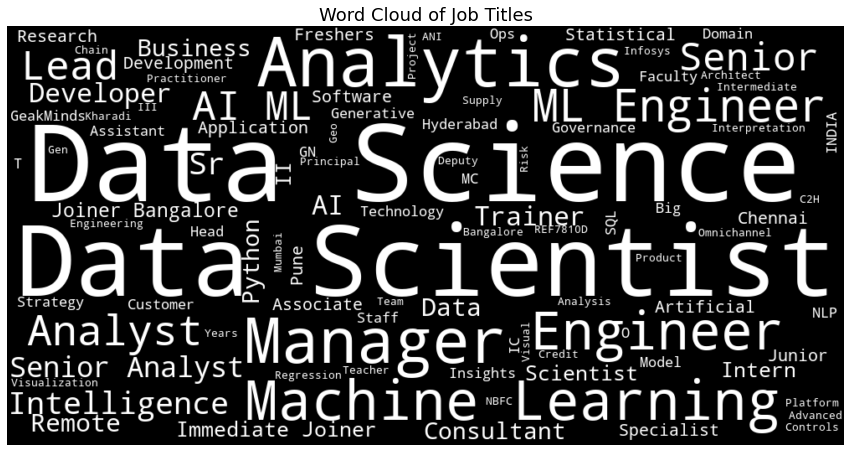

In [26]:
wordcloud(df, 'Title', 'black', 'white', 'Word Cloud of Job Titles')

##### Word Cloud - Skills

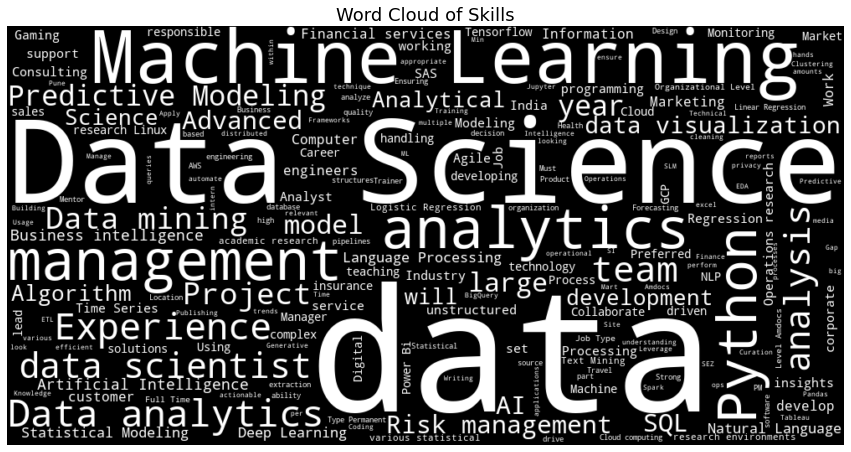

In [27]:
# Prepare data: Filter the data to remove fields where skills data is not available.
skills_for_viz = df[df['Skills'] != 'Not available'] 

# Plot filtered data for skills.
wordcloud(skills_for_viz, 'Skills', 'black', 'white', 'Word Cloud of Skills')

##### Word Cloud - Job Locations

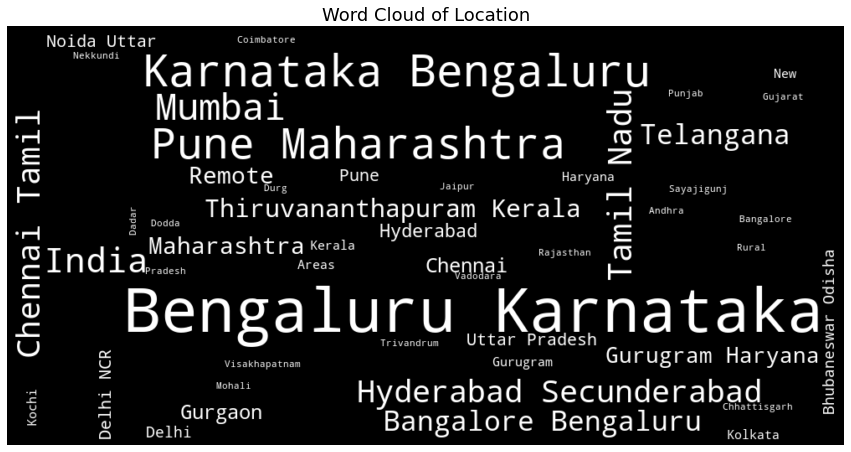

In [28]:
# Prepare data: Filter the data to remove fields where location data is not available.
location_for_viz = df[df['Location'] != 'Not available'] 

# Plot filtered data for location.
wordcloud(location_for_viz, 'Location', 'black', 'white', 'Word Cloud of Location')

##### A word cloud is a useful visualization for identifying the most common job titles, required skills and location for data science jobs quickly and clearly.

##### Create a function to set plot labels for various charts

In [29]:
# Function to set plot labels.

def set_plot_labels(ax, x_label, y_label, title, x_label_fontsize=14, y_label_fontsize=14, title_fontsize=18):
    '''
    This function is used to set plot labels for different types of plots.
    
    Args:
        ax: axes object created from the plt.subplots() function.
        x_label(str): x-axis label
        y_label(str): y-axis label
        title(str): title of the plot
        x_label_fontsize(int): default=14: x-axis label fontsize
        y_label_fontsize(int): default=14: y-axis label fontsize
        title_fontsize(int): default=18: plot title fontsize
    
    Returns:
        All the plot labels with the assigned parameters.
    '''
    
    ax.set_xlabel(x_label, fontsize=x_label_fontsize)
    ax.set_ylabel(y_label, fontsize=y_label_fontsize)
    ax.set_title(title, fontsize=title_fontsize)


#### Column Chart - Analyzing Salary vs. Experience

Note: Many companies do not disclose salary details in their job postings and therefore this data is not available for all the jobs. Hence, the analysis is performed on the available salary data by filtering out the 'Not available' fields.

In [30]:
# Let us analyze the salary range w.r.t. years of experience

# Prepare data

# Create a copy of the df for plotting data.
df_for_plot = df.copy()

# Filter salary data to remove 'Not available' fields.
df_for_plot = df_for_plot[df_for_plot['Salary'] != 'Not available']

# Calculate the average salary within a range and assign it to a new column named 'Average_Salary'.

for index, row in df_for_plot.iterrows():    
    sal_low = int(row['Salary'].split('-')[0])
    sal_high = int(row['Salary'].split('-')[-1])
    avg_sal = (sal_low + sal_high) / 2
    
    df_for_plot.at[index, 'Average_Salary'] = int(avg_sal)
    
# Filter df_for_plot to exclude fields where 'Experience' data is not available.
df_for_plot = df_for_plot[df_for_plot['Experience'] != 'Not available']
    

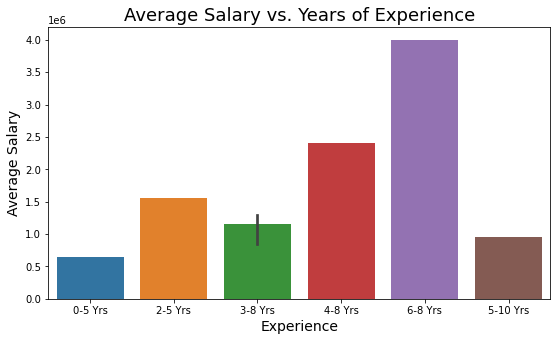

In [31]:
# Plot the data

# Create figure
fig, ax = plt.subplots(figsize=(9, 5))

# Plot the bar plot using seaborn
sns.barplot(x='Experience', y='Average_Salary', data=df_for_plot)

# Set the labels using the set_plot_labels() function.
set_plot_labels(ax, 'Experience', 'Average Salary', 'Average Salary vs. Years of Experience')

# Show the plot
plt.show()

#### Column Chart - Job Posting Recency

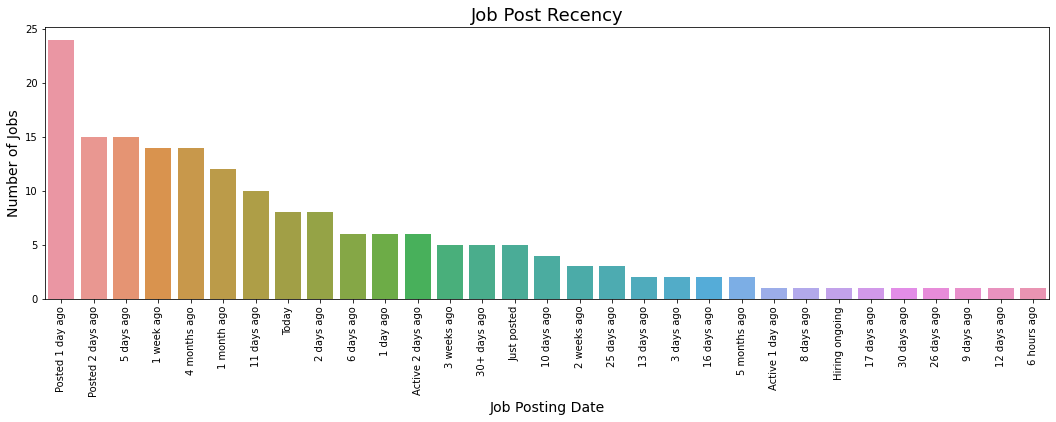

In [32]:
# Create the figure.
fig, ax = plt.subplots(figsize=(18, 5))

# Plot the data
sns.countplot(x='Job_Post_Date', data=df, order=df['Job_Post_Date'].value_counts().index, ax=ax)

# Set the labels using the set_plot_labels() function.
set_plot_labels(ax, 'Job Posting Date', 'Number of Jobs', 'Job Post Recency')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Show the plot
plt.show()

#### Pie Chart - Work Type

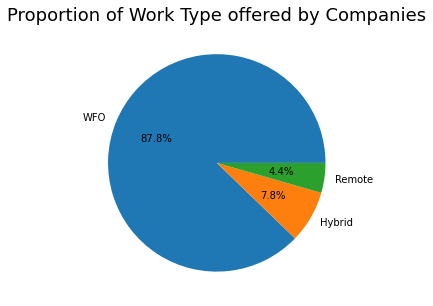

In [33]:
# Pie chart displaying the work type preferred by Companies

# Prepare data
values = df['Work_Type'].value_counts().values
labels = df['Work_Type'].value_counts().index

# Plot data
plt.figure(figsize=(10,5))
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Proportion of Work Type offered by Companies', fontsize=18)

# Show the plot
plt.show()

### Conclusion

This EDA project focusses on data science job trends and requirements preferred by companies.  
The first step is to get the most recent data. This feat is accomplished by scraping prominent job sites like naukri, indeed and linkedin which contain a large number job postings from recruiters all over the country.   
However, due to inconsistencies in the scraped data, it is very important to perform data cleaning to make the data ready for analysis and eliminate the chances of bias crawling into the analysis.  
The cleaned data is then used to create various types of visualizations to make sense of the data and understand the job trends and requirements in the data science domain.